# Case Study 1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://cdn.oreillystatic.com/oreilly/booksamplers/9781449367619_sampler.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Twitter Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using twitter data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

We are looking at the trending hashtags and finding out the emotional responses people have in various regions due to 
those hashtags. We can categorize regions of the country by the emotional words used in tweets. This problem is interesting
because you can find out how regions feel about specific issues and trends by the way people react to them on twitter. This is
important because the data could be used by companies for advertising or politicians to find out how people feel about certain social
issues.

## Data Collection: Download Twitter Data using API

* In order to solve the above problem, you need to collect some twitter data. You could select a topic that is relevant to your problem, and use Twitter API to download the relevant tweets. It is recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [1]:
import twitter, json, operator, sys
import collections
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'htBMGArjlGDW8FXLlb9iuXHW4'
    CONSUMER_SECRET ='udmNO1AFXMi1B5ZEmlmn0jY8oudyKkinXsa3ZpjzfMUwP0Txqj'
    OAUTH_TOKEN = '361006898-N3gjDZDTEvM6s4SQPNZGuJJN1e7HSGcnuHKr578l'
    OAUTH_TOKEN_SECRET = '0BNDtw48dwzu3PyWRd0zh2jMP977xGIy05rIQ1GAbQNJt'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
twitter_api = oauth_login()
query = '#GorsuchHearing' #Popular right now
question = {}
counter1 = 0
lowestID = 0
#<insert your code here>
#   Please add comments to explain the general idea of each block of the code.
for i in range (1, 3):
    if i == 1:
        tempQuestion = twitter_api.search.tweets(q=query, count=100)
    else:
        tempQuestion = twitter_api.search.tweets(q=query, count=100, max_id=lowestID)
    #didn't quite get this to build properly, got 100 tweets
    question = dict(question.items() + tempQuestion.items())
    for result in question["statuses"]:
        if result['id'] < lowestID or lowestID == 0:
            lowestID = result['id']

for result in question["statuses"]:
     counter1 += 1
     # print "(%s) @%s %s" % (result["created_at"], result["user"]["screen_name"], result["text"])


json_file_name = 'Results.json'
#---------
list_tweets = question
print list_tweets

#------------

with open(json_file_name, 'w') as outfile: #output the JSON in a dump, just the statuses
    json.dump(list_tweets["statuses"], outfile)


{u'search_metadata': {u'count': 100, u'completed_in': 0.13, u'max_id_str': u'844298605439574016', u'since_id_str': u'0', u'next_results': u'?max_id=844298442348380161&q=%23GorsuchHearing&count=100&include_entities=1', u'refresh_url': u'?since_id=844298605439574016&q=%23GorsuchHearing&include_entities=1', u'since_id': 0, u'query': u'%23GorsuchHearing', u'max_id': 844298605439574016L}, u'statuses': [{u'contributors': None, u'truncated': False, u'text': u'RT @DemsTalk: #GorsuchHearing \n"There is no higher public service than serving on the United States Supreme Court"\n- Merrick Garland https:\u2026', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 844298605439574016L, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_mentions': [{u'id': 796513830465662976L, u'indices': [3, 12], u'id_str': u'796513830465662976', u'screen_name': u'DemsTalk', u'name': u'DemsTalk'}], u'hashtags': [{u'indices': [14, 29], u'text': u'GorsuchHearing'}], u'urls': []}, u'retweeted': Fal

### Report  statistics about the tweets you collected 

In [2]:
# The total number of tweets collected:  < INSERT THE NUMBER HERE>
#<insert your code here>
number_tweets = counter1
print number_tweets



100


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import json, operator
json_file_name = 'Results.json'
#--------
result = []
new_list_of_tweets = json.loads(open(json_file_name, "r").read())
#Read in the file
wordDict = dict();
for i in range (0, counter1):
    # print new_list_of_tweets[i]
    tempList = new_list_of_tweets[i]["text"].lower().split()
    for word in tempList:
        if word in wordDict:
            wordDict[word] += 1
        else:
            wordDict[word] = 1

import operator
from prettytable import PrettyTable
table = PrettyTable(['Word', 'Count'])

sorted_wordDict = list(reversed(sorted(wordDict.items(), key=operator.itemgetter(1))))
tempCounter = 0
while tempCounter < 30:
    table.add_row([str(sorted_wordDict[tempCounter][0]),str(sorted_wordDict[tempCounter][1])])
    tempCounter += 1
print table



+-----------------+-------+
|       Word      | Count |
+-----------------+-------+
|        rt       |   87  |
| #gorsuchhearing |   83  |
|       the       |   56  |
|        is       |   37  |
|        to       |   35  |
|        a        |   30  |
|        of       |   21  |
|       and       |   21  |
|     gorsuch     |   17  |
|     #gorsuch    |   16  |
|        on       |   14  |
|       for       |   12  |
|        in       |   12  |
|       that      |   12  |
|        u        |   10  |
|        al       |   10  |
|        i        |   10  |
|    democrats    |   10  |
|        at       |   9   |
|        be       |   9   |
|     watching    |   9   |
|     #scotus     |   9   |
|       have      |   9   |
|     franken     |   9   |
|        if       |   8   |
|        my       |   8   |
|        up       |   7   |
| #confirmgorsuch |   7   |
|      &amp;      |   7   |
|  #theresistance |   7   |
+-----------------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [4]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
Associations = dict()
for i in range (0, counter1):
    Associations[new_list_of_tweets[i]["text"]] = new_list_of_tweets[i]["retweet_count"]

sorted_Associations = list(reversed(sorted(Associations.items(), key=operator.itemgetter(1))))
tempCounter = 0
while tempCounter < 10:
    print sorted_Associations[tempCounter][0].encode('utf-8').strip() + ": " + str(sorted_Associations[tempCounter][1])
    tempCounter += 1









RT @Chelseashow: In case you forgot — Republicans blocked Obama's Supreme Court nominee for 293 f***ing days. #GorsuchHearing https://t.co/…: 1982
RT @RealJack: RETWEET if you want Judge Neil Gorsuch to be confirmed. #ConfirmGorsuch #GorsuchHearing https://t.co/wrK1c2KtV7: 1450
RT @Impeach_D_Trump: In case you forgot — Republicans blocked Obama's Supreme Court nominee for 293 f***ing days. #GorsuchHearing: 1033
RT @funder: Democrats Must #BlockGorsuch

RT if u agree—If u don't agree then get off my page😎

#GorsuchHearing #gorsuch #scotus https://t.…: 813
RT @DineshDSouza: Watching career comedian Al Franken try and sound like a statesman in #GorsuchHearing makes for painful listening https:/…: 662
RT @mcspocky: TRUTH #GorsuchHearing
#GarlandNotGorsuch https://t.co/FjyGV1WJ83: 607
RT @GeorgiaDirtRoad: Democrats are making fools out of themselves! 

#NeilGorsuch #GorsuchHearing 
#ConfirmGorsuch #MAGA 🇺🇸 https://t.co/JM…: 570
RT @RealVinnieJames: As I watch the #GorsuchHearing, I'm moved 

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

Most Common Hashtags
-----------------------------
GorsuchHearing: 99
gorsuch: 8
Gorsuch: 8
TuesdayMotivation: 7
ConfirmGorsuch: 7
MAGA: 6
scotus: 5
BlockGorsuch: 5
JudgeGorsuch: 5
resist: 5

Most Common User Mentions
-----------------------------
funder: 5
DineshDSouza: 4
NPR: 3
RealVinnieJames: 3
IMPL0RABLE: 3
TheMarkRomano: 3
Impeach_D_Trump: 3
infowars: 3
DaShanneStokes: 3
RogerJStoneJr: 3


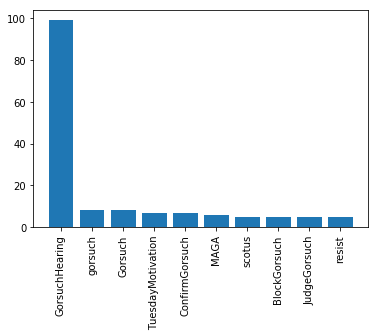

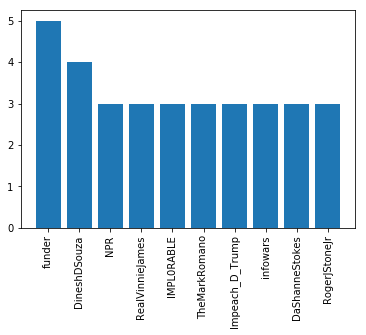

In [5]:
import matplotlib.pyplot as plt

hashtags = dict()
mentioned_users = dict()

# Iterate through tweets
for i in range (0, number_tweets):
    # Get hashtags entity
    curr_hashtags = new_list_of_tweets[i]["entities"]["hashtags"]
    
    # Get mentions entity
    curr_mentions = new_list_of_tweets[i]["entities"]["user_mentions"]    
    
    # Get hashtag counts
    for j in range(0, len(curr_hashtags)):
        hashtag_text = curr_hashtags[j]["text"]
        if hashtag_text in hashtags:
            hashtags[hashtag_text] += 1
        else:
            hashtags[hashtag_text] = 1
            
    # Get mentions counts
    for j in range(0, len(curr_mentions)):
        mention_text = curr_mentions[j]["screen_name"]
        if mention_text in mentioned_users:
            mentioned_users[mention_text] += 1
        else:
            mentioned_users[mention_text] = 1

# Sort entities
sorted_hashtags = list(reversed(sorted(hashtags.items(), key=operator.itemgetter(1))))
sorted_mentioned_users = list(reversed(sorted(mentioned_users.items(), key=operator.itemgetter(1))))

# Get min of entity count and 10
hashtag_item_count = len(sorted_hashtags) if len(sorted_hashtags) < 10 else 10
mentioned_users_item_count = len(sorted_mentioned_users) if len(sorted_mentioned_users) < 10 else 10

# Print tables
print '{}{}{}'.format('Most Common Hashtags', '\n', '-----------------------------')
for i in range(0, hashtag_item_count):
    print '{}: {}'.format(sorted_hashtags[i][0], sorted_hashtags[i][1])
    
print '{}{}{}{}'.format('\n', 'Most Common User Mentions', '\n', '-----------------------------')
for i in range(0, mentioned_users_item_count):
    print '{}: {}'.format(sorted_mentioned_users[i][0], sorted_mentioned_users[i][1])

# Graphs
hashtags_texts = [hash[0] for hash in sorted_hashtags[0:10]]
hashtags_counts = [hash[1] for hash in sorted_hashtags[0:10]]

hashtags_len = range(len(hashtags_texts))
plt.bar(hashtags_len, hashtags_counts, align='center')
locs, labels = plt.xticks(hashtags_len, hashtags_texts)
plt.setp(labels, rotation=90)
plt.show()

user_mention_texts = [hash[0] for hash in sorted_mentioned_users[0:10]]
user_mention_counts = [hash[1] for hash in sorted_mentioned_users[0:10]]

user_mention_len = range(len(user_mention_texts))
plt.bar(user_mention_len, user_mention_counts, align='center')
locs, labels = plt.xticks(user_mention_len, user_mention_texts)
plt.setp(labels, rotation=90)
plt.show()

Plot a histogram of the number of user mentions in the list using the following bins.

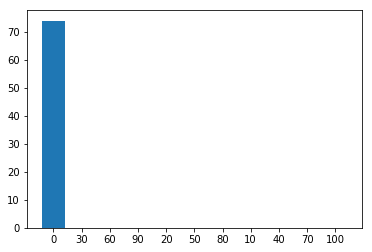

In [6]:
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bins_dict = dict()

# Initialize bins
for bin in bins:
    bins_dict[bin] = 0

# Put values in bins
for user in sorted_mentioned_users:
    count = user[1]
    bin_count = (count / 10) * 10
    
    bins_dict[bin_count] += 1

# Sort bins
sorted_bins = list(reversed(sorted(bins_dict.items(), key=operator.itemgetter(1))))

# Graph histogram
bin_ids = [bin[0] for bin in sorted_bins]
bin_vals = [bin[1] for bin in sorted_bins]

bins_len = range(len(bin_ids))
plt.bar(bins_len, bin_vals, align='center')
locs, labels = plt.xticks(bins_len, bin_ids)
plt.show()


 ** (4) Getting "All" friends and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import time
import tweepy
from prettytable import PrettyTable

CONSUMER_KEY1 = 'htBMGArjlGDW8FXLlb9iuXHW4'
CONSUMER_SECRET1 ='udmNO1AFXMi1B5ZEmlmn0jY8oudyKkinXsa3ZpjzfMUwP0Txqj'
OAUTH_TOKEN1 = '361006898-N3gjDZDTEvM6s4SQPNZGuJJN1e7HSGcnuHKr578l'
OAUTH_TOKEN_SECRET1 = '0BNDtw48dwzu3PyWRd0zh2jMP977xGIy05rIQ1GAbQNJt'
auth = tweepy.OAuthHandler(CONSUMER_KEY1,CONSUMER_SECRET1)
auth.set_access_token(OAUTH_TOKEN1,OAUTH_TOKEN_SECRET1)
tweepyApi = tweepy.API(auth)
ids = []

# get IDS of followers
for name in tweepy.Cursor(tweepyApi.followers_ids, screen_name="funder").items(20):
    ids.append(name)

# get usernames from follower ids
screen_names = [user.screen_name for user in tweepyApi.lookup_users(user_ids=ids)]

# print max 20 followers usernames and IDs
t = PrettyTable(['Follower UserName', 'ID'])
sizemax = 20
if len(screen_names)<20:
    sizemax = len(screen_names)
for x in range(0,sizemax):
    t.add_row([screen_names[x],ids[x]])
print t



# get IDS of friends
ids2 = []
for name in tweepy.Cursor(tweepyApi.friends_ids, screen_name="funder").items(20):
    ids2.append(name)
    

# get usernames from friend ids

screen_names2 = [user.screen_name for user in tweepyApi.lookup_users(user_ids=ids2)]


# print max 20 followers usernames and IDs
t2 = PrettyTable(['Friend UserName', 'ID'])
sizemax = 20
if len(screen_names)<20:
    sizemax = len(screen_names)
for x in range(0,sizemax):
    t2.add_row([screen_names2[x],ids2[x]])
print t2





+-------------------+--------------------+
| Follower UserName |         ID         |
+-------------------+--------------------+
|      Laacys12     | 812746845982031872 |
|  DistrictTherapy  |     308817038      |
|   MoreBuildings   |     3386091679     |
|      bkillip      |      53988379      |
|      tazzie44     |      38676569      |
|   Louise54883848  | 844282591276515328 |
|  Maricel46700704  |     3304629596     |
|    Veronica2027   |     330031120      |
|       DrGMac      |      38676040      |
|   toni_bowen0830  |     3148850748     |
|      LynnDe6      | 793950346334720000 |
|     scramblera    |      22772159      |
|      MrsGinaB     |      71948075      |
|     PanicFolks    |     4906366649     |
|  KelsMermaid2015  |     3248110248     |
|    golfwidow72    |      52717110      |
|     TallHayfe     |     3346746425     |
|  Maryann72991757  | 832799620296167424 |
|      902_275      | 813875926731816960 |
|     digresster    |     429185793      |
+----------

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
#Our solution is taking twitter data from specific hashtags and looking for specific words and hashtags in those tweets
#we will take twitter location data from each of those tweets and plot regions 











Write codes to implement the solution in python:

In [8]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary















# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [9]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary








*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 1".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (5 points) how well did the team describe the problem they are trying to solve using twitter data? 
       0: not clear
       1: I can barely understand the problem
       2: okay, can be improved
       3: good, but can be improved
       4: very good
       5: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection:
    ----------------------------------
    
    3. (10 points) Do you think the data collected are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale (> 300 tweets)
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    (1) Word Count (5 points):
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (2) Find the most popular tweets in your collection of tweets: (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect
    
    (3) Find popular twitter entities  (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    (4) Find user's followers and friends (5 points)
       0: missing answer
       1: okay, but with major problems
       3: good, but with minor problems
       5: perfect

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? 
       0: not relevant
       1: barely relevant to the problem
       2: okay solution, but there is an easier solution.
       3: good, but can be improved
       4: very good, but solution is simple/old
       5: innovative and technically sound
       
    7. how well did the team implement the solution in python? 
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? 
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think the results they found in the data? 
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  
       -1: I vote the other team is better than this team
        0: the same
        1: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9
       10: Team 10

